In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
series = trend(time, 0.1)  
baseline = 10
amplitude = 40
slope = 0.05
noise_level = 5

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
# Update with noise
series += noise(time, noise_level, seed=42)

split_time = 1000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

### Windowed Data Preparation

In [3]:
window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

# Function that creates windowed dataset
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    
    # Ensures windows are of equal size
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    
    # Flattens the dataset
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    
    # Shuffles the dataset
    dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
    
    # Batches the data into sets of 32
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

In [4]:
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
print(dataset)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on

### Model Definition

In [5]:
# Defines the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape=[window_size], activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

### Model Compilation & Fitting

In [6]:
# Learning rate scheduler
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))

In [7]:
# Compiles the model
model.compile(loss="mse", 
              optimizer=tf.keras.optimizers.SGD(lr=1e-6, 
                                                momentum=0.9)
             )

# Fits the model
history = model.fit(dataset, epochs=70, verbose=1)

Epoch 1/70
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
31/31 [==============================] - 0s 3ms/step - loss: 206.2847
Epoch 2/70
31/31 [==============================] - 0s 2ms/step - loss: 138.8417
Epoch 3/70
31/31 [==============================] - 0s 3ms/step - loss: 110.4506
Epoch 4/70
31/31 [==============================] - 0s 2ms/step - loss: 96.7914
Epoch 5/70
31/31 [==============================] - 0s 2ms/step -

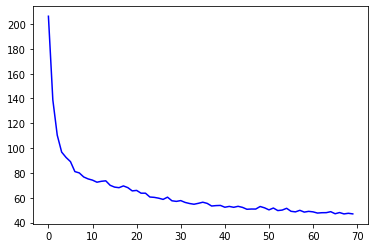

In [8]:
loss = history.history['loss']
epochs = range(len(loss))
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.show()

[74.17463684082031, 72.51174926757812, 73.24898529052734, 73.63053131103516, 70.01042938232422, 68.56243896484375, 68.10210418701172, 69.514892578125, 68.14532470703125, 65.51274871826172, 65.89181518554688, 63.66811752319336, 63.65148162841797, 60.57872772216797, 60.2874755859375, 59.63270568847656, 58.65815353393555, 60.447086334228516, 57.53965377807617, 57.05874252319336, 57.68191909790039, 56.20402526855469, 55.340423583984375, 54.749549865722656, 55.49503707885742, 56.379249572753906, 55.43413543701172, 53.32167434692383, 53.65267562866211, 53.79586410522461, 52.335487365722656, 53.002288818359375, 52.284812927246094, 53.08421325683594, 52.22029495239258, 50.702571868896484, 50.8958625793457, 50.872066497802734, 52.92491912841797, 51.851802825927734, 50.21917724609375, 51.69879150390625, 49.649410247802734, 50.048240661621094, 51.480587005615234, 49.065574645996094, 48.59880828857422, 49.849063873291016, 48.41600799560547, 49.01673126220703, 48.60295104980469, 47.637046813964844,

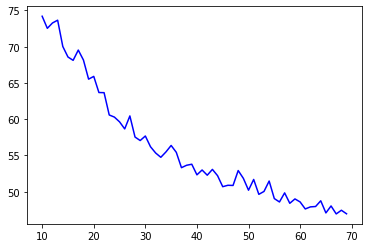

In [9]:
# Plot all but the first 10
loss = history.history['loss']
epochs = range(10, len(loss))
plot_loss = loss[10:]
print(plot_loss)
plt.plot(epochs, plot_loss, 'b', label='Training Loss')
plt.show()

In [10]:
forecast = []

for time in range(len(series) - window_size):
    prediction = model.predict(series[time:time + window_size][np.newaxis])
    forecast.append(prediction)

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


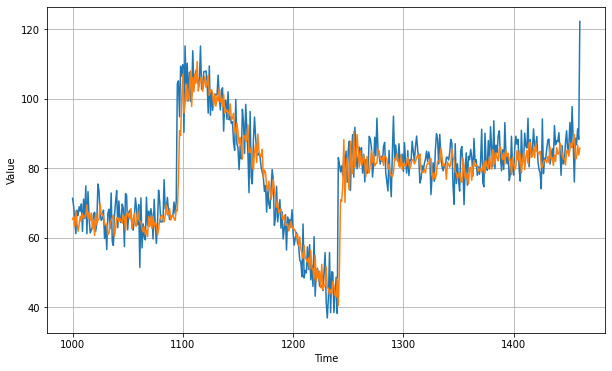

In [11]:
# Plots the t
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, results)

In [12]:
# Calculates the MAE
tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()

5.0315247